<a href="https://colab.research.google.com/github/Aziz-ur-Rehman11/Prodigy-ML-Virtial-Internship-Tasks/blob/main/Prodigy_ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.12G/2.13G [00:07<00:00, 316MB/s]
100% 2.13G/2.13G [00:07<00:00, 304MB/s]


In [ ]:
!unzip /content/leapgestrecog.zip

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!rm -r /content/leapgestrecog

In [ ]:
path='/content/leapGestRecog'

images = []
labels = []

for folder in os.listdir(path):
    folder_path = os.path.join(path,folder)

    for Class_name in os.listdir(folder_path):

        for img in os.listdir(os.path.join(folder_path,Class_name)):
            img_path = os.path.join(folder_path,Class_name,img)
            images.append(img_path)
            labels.append(Class_name)

In [ ]:
print('number of Images:', len(images))
print('number of Labels:', len(labels))

number of Images: 20000
number of Labels: 20000


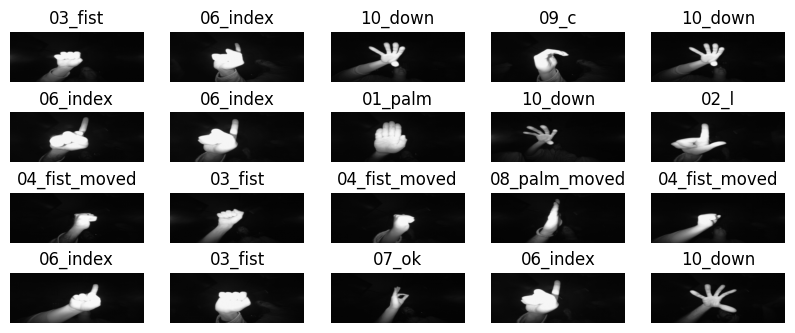

In [ ]:
random_image_indices = random.sample(range(len(images)), 20)
plt.figure(figsize=(10, 4))
for i, index in enumerate(random_image_indices):
    img = cv2.imread(images[index])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[index])
    plt.axis('off')
plt.show()

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np.array(labels)
Y = to_categorical(labels, num_classes=10)

In [ ]:
def load_and_preprocess_image(image_path):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = cv2.GaussianBlur(img, (5, 5), 0)    # Uncomment if you want to check use
  img = cv2.resize(img, (img_width, img_height))
  img = img / 255.0
  return img

In [ ]:
X = []
img_width, img_height = 240, 240
for image in tqdm.tqdm(images):
  image = load_and_preprocess_image(image)
  X.append(image)

100%|██████████| 20000/20000 [00:50<00:00, 397.84it/s]


In [ ]:
X = np.array(X)
X = X.reshape(-1, img_width, img_height, 1) # adding a depth of 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)  # Should match input shape
print(y_train.shape, y_test.shape)  # Should match output shape

(12800, 240, 240, 1) (4000, 240, 240, 1)
(12800, 10) (4000, 10)


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [ ]:
model=Sequential([
    Conv2D(32,(2,2),activation='relu',input_shape=(240, 240, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True,
                               verbose=1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 239, 239, 32)      160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 119, 119, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 58, 58, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 128)      

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/20
400/400 [==============================] - 191s 476ms/step - loss: 0.4074 - accuracy: 0.8658 - precision: 0.9475 - recall: 0.8177 - val_loss: 0.0118 - val_accuracy: 0.9970 - val_precision: 0.9975 - val_recall: 0.9970
Epoch 2/20
400/400 [==============================] - 187s 468ms/step - loss: 0.0677 - accuracy: 0.9788 - precision: 0.9831 - recall: 0.9759 - val_loss: 0.0077 - val_accuracy: 0.9983 - val_precision: 0.9983 - val_recall: 0.9983
Epoch 3/20
400/400 [==============================] - 187s 467ms/step - loss: 0.0397 - accuracy: 0.9875 - precision: 0.9893 - recall: 0.9856 - val_loss: 0.0023 - val_accuracy: 0.9995 - val_precision: 0.9995 - val_recall: 0.9995
Epoch 4/20
400/400 [==============================] - 188s 469ms/step - loss: 0.0310 - accuracy: 0.9898 - precision: 0.9908 - recall: 0.9890 - val_loss: 0.0032 - val_accuracy: 0.9990 - val_precision: 0.9992 - val_recall: 0.9990
Epoch 5/20
400/400 [==============================] - 188s 471ms/step - loss: 0.0230 - a

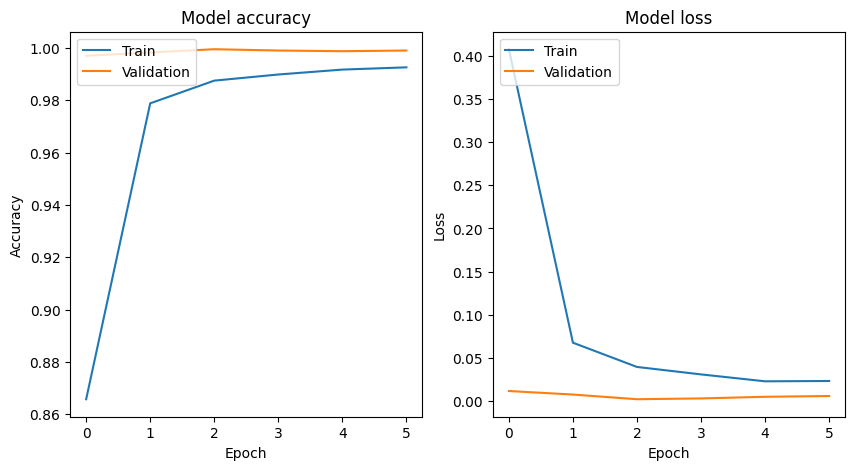

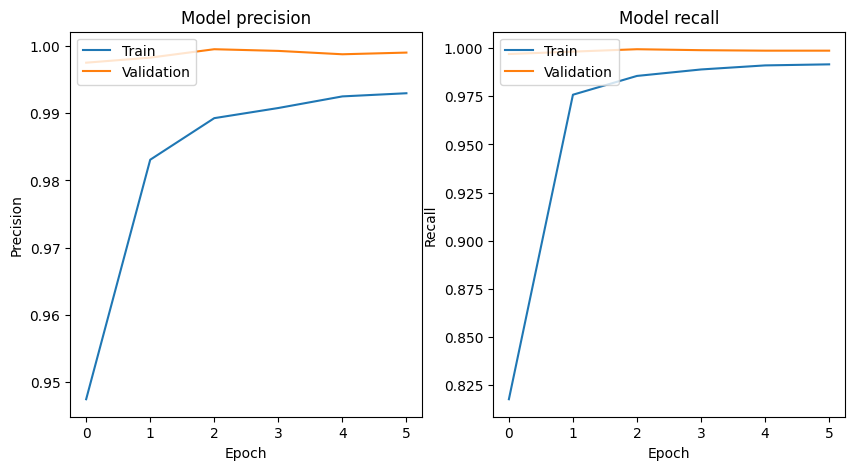

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation precision values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation recall values
plt.subplot(1, 2, 2)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print("Predictions")
predictions = model.predict(X_test)
predicted_classes =  np.argmax(predictions , axis =1)
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

Predictions
125/125 [==============================] - 12s 95ms/step - loss: 0.0023 - accuracy: 0.9995 - precision: 0.9995 - recall: 0.9995
Test Loss: 0.002305487170815468
Test Accuracy: 0.9994999766349792
Test Precision: 0.9994999766349792
Test Recall: 0.9994999766349792


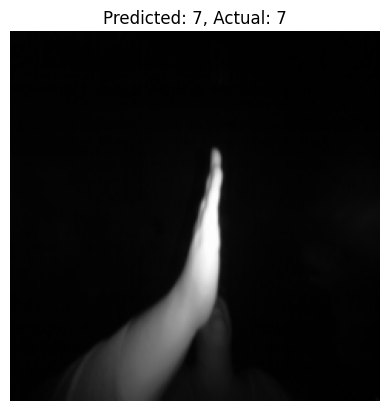

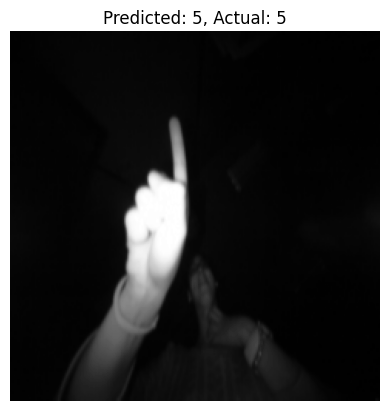

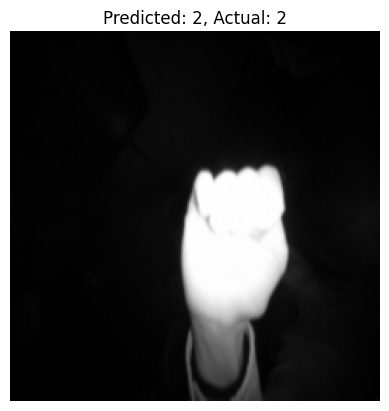

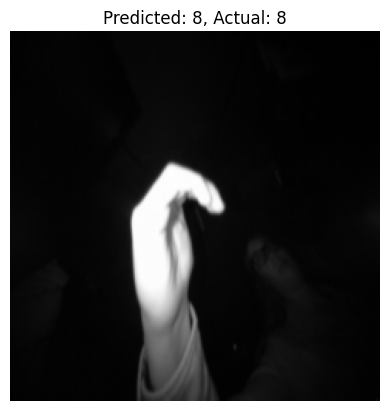

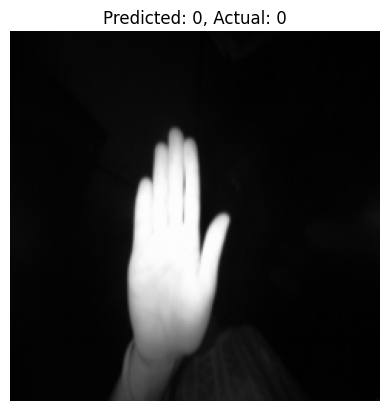

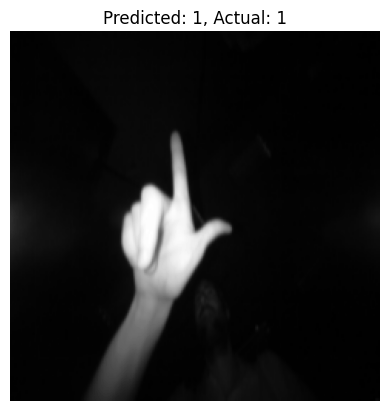

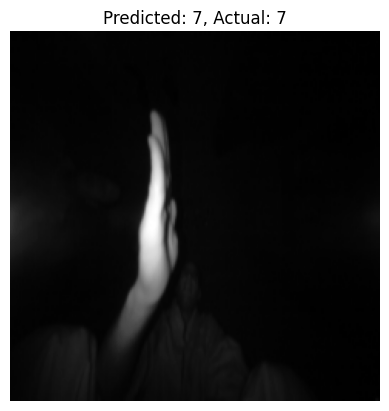

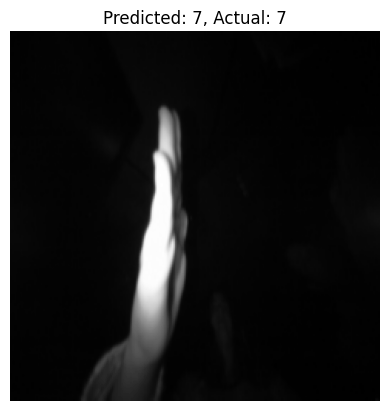

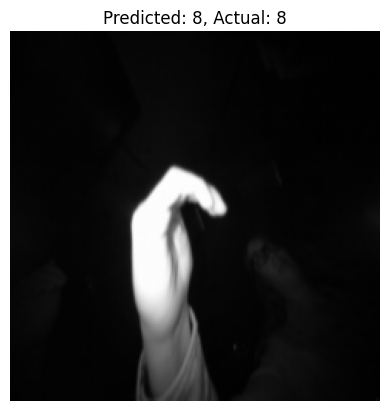

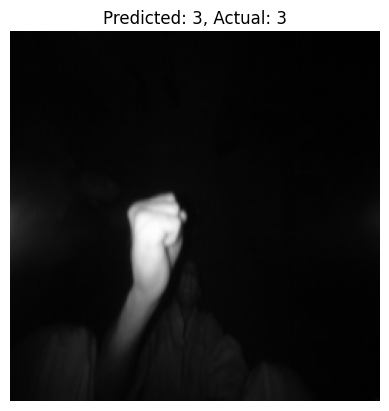

In [ ]:
random_indices = random.sample(range(len(X_test)), 10)

for i in random_indices:
    img = X_test[i].reshape(240, 240)
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8) # Normalize for display

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()

In [ ]:
model.save('Hand_Gesture_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
